<a href="https://colab.research.google.com/github/karthik-1311/Machine-Learning/blob/main/ML_Assignment_1(199).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Part A
# Step (1) Loading data into memory from drive
# Dataset: Fish.csv

from google.colab import drive
import pandas as pd
import numpy as np

# Mount your Google Drive


# Load the dataset
df = pd.read_csv('Fish.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
display(df.head())

# Show dataset info (column names, data types, missing values)
print("\nDataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
display(df.describe())


First 5 rows of the dataset:


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None

Summary Statistics:


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
# Part A
# Step (2) Making X matrix and y vector
# Dropping irrelevant columns such as non-numeric or categorical (object) types

# Dropping 'Species' since it is a categorical column
df = df.drop(columns=['Species'])

# Defining features (X) and target (y)
# Assuming 'Weight' is the target variable we want to predict
X = df.drop(columns=['Weight'])
y = df['Weight']

# Displaying basic info about dataset
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of X:")
display(X.head())
print("\nFirst 5 values of y:")
print(y.head())


Features (X) shape: (159, 5)
Target (y) shape: (159,)

First 5 rows of X:


,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340



First 5 values of y:
0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64


In [ ]:
# Part B
from sklearn.model_selection import train_test_split

# Splitting into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Dropping rows with missing values (if any)
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]  # keeping alignment

X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

print("Train set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Train set size: 127
Test set size: 32
Shape of X_train: (127, 5)
Shape of X_test: (32, 5)


In [ ]:
# Part C
from sklearn.linear_model import LinearRegression

# Creating a Linear Regression model
lin_reg = LinearRegression()

# Fitting the model on training data
lin_reg.fit(X_train, y_train)

# Print model parameters
print("Intercept (b):", lin_reg.intercept_)
print("Weights (w):", lin_reg.coef_)


Intercept (b): -515.305651338433
Weights (w): [ 43.5352649    7.82179624 -25.25670105  23.2289123   27.06649294]


In [ ]:
# Part D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Defining the λ values (regularization strengths)
lambdas = [0, 0.1, 1, 10, 100, 1000]

# Storage for results
train_losses = []
test_losses = []
weight_norms = []
weight_values = []
train_r2 = []
test_r2 = []

# Training Ridge Regression for each λ
for lam in lambdas:
    # Ridge Regression (L2 regularization)
    ridge_reg = Ridge(alpha=lam, max_iter=10000)
    ridge_reg.fit(X_train, y_train)

    # Predictions
    y_train_pred = ridge_reg.predict(X_train)
    y_test_pred = ridge_reg.predict(X_test)

    # Mean Squared Error (MSE)
    train_losses.append(mean_squared_error(y_train, y_train_pred))
    test_losses.append(mean_squared_error(y_test, y_test_pred))

    # L2 Norm of weight vector
    weight_norms.append(np.linalg.norm(ridge_reg.coef_))

    # Store actual weight values (for plotting)
    weight_values.append(ridge_reg.coef_)

    # R² Score
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))

# Display results
print("Lambda values:", lambdas)
print("Train MSE:", train_losses)
print("Test MSE:", test_losses)
print("Train R²:", train_r2)
print("Test R²:", test_r2)


Lambda values: [0, 0.1, 1, 10, 100, 1000]
Train MSE: [14273.454241345657, 14273.471274179628, 14274.654608500576, 14307.2668182594, 14810.423365628194, 16096.95232918599]
Test MSE: [16763.887193141025, 16770.588296384485, 16820.956619468, 17022.022283804905, 17544.73719196571, 19424.04215296526]
Train R²: [0.883887896537022, 0.8838877579778375, 0.8838781317559866, 0.8836128370200632, 0.8795197447595416, 0.8690540521809345]
Test R²: [0.8821430593048675, 0.8820959478253845, 0.881741838041766, 0.8803282646977937, 0.8766533664345332, 0.8634410887101153]


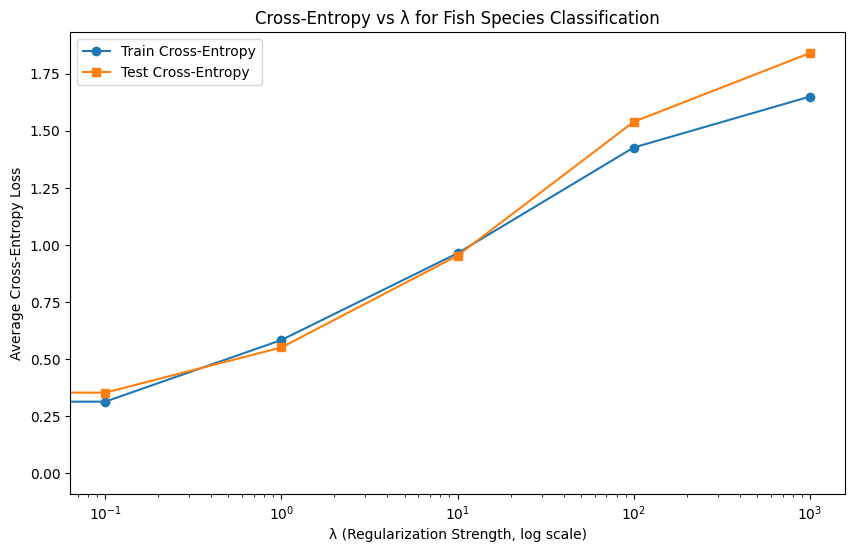

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Load Fish dataset
df = pd.read_csv("Fish.csv")  # replace with your file path

# Features and target
X = df[['Length1', 'Length2', 'Length3', 'Height', 'Width']]  # numeric features
y = df['Species']

# Encode species labels
le = LabelEncoder()
y = le.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Regularization strengths
lambdas = [0, 0.1, 1, 10, 100, 1000]
train_losses = []
test_losses = []

for l in lambdas:
    C = np.inf if l == 0 else 1/l  # sklearn uses C = 1/λ
    model = LogisticRegression(C=C, max_iter=1000, solver='lbfgs')
    model.fit(X_train, y_train)
    y_train_pred = model.predict_proba(X_train)
    y_test_pred = model.predict_proba(X_test)

    train_losses.append(log_loss(y_train, y_train_pred))
    test_losses.append(log_loss(y_test, y_test_pred))

# Plotting
plt.figure(figsize=(10,6))
plt.plot(lambdas, train_losses, marker='o', label="Train Cross-Entropy")
plt.plot(lambdas, test_losses, marker='s', label="Test Cross-Entropy")
plt.xscale("log")
plt.xlabel("λ (Regularization Strength, log scale)")
plt.ylabel("Average Cross-Entropy Loss")
plt.title("Cross-Entropy vs λ for Fish Species Classification")
plt.legend()
plt.show()


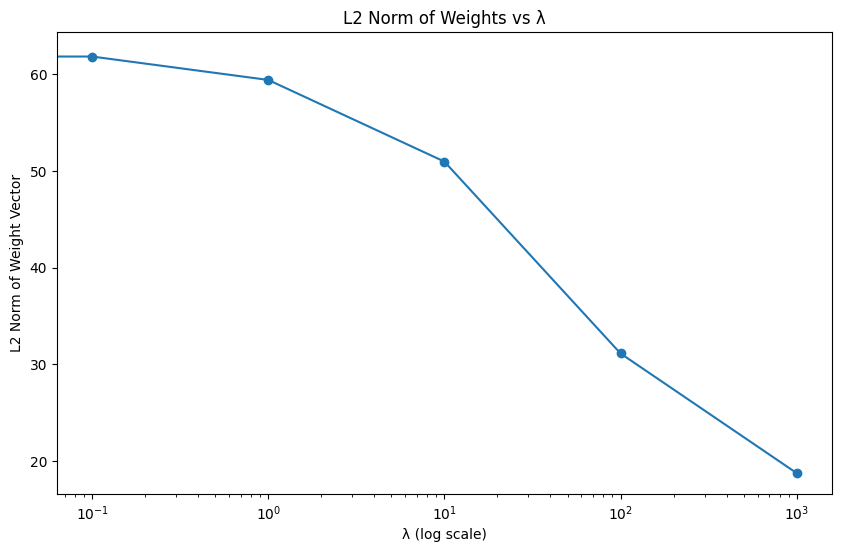

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(lambdas, weight_norms, marker='o')
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("L2 Norm of Weight Vector")
plt.title("L2 Norm of Weights vs λ")
plt.show()


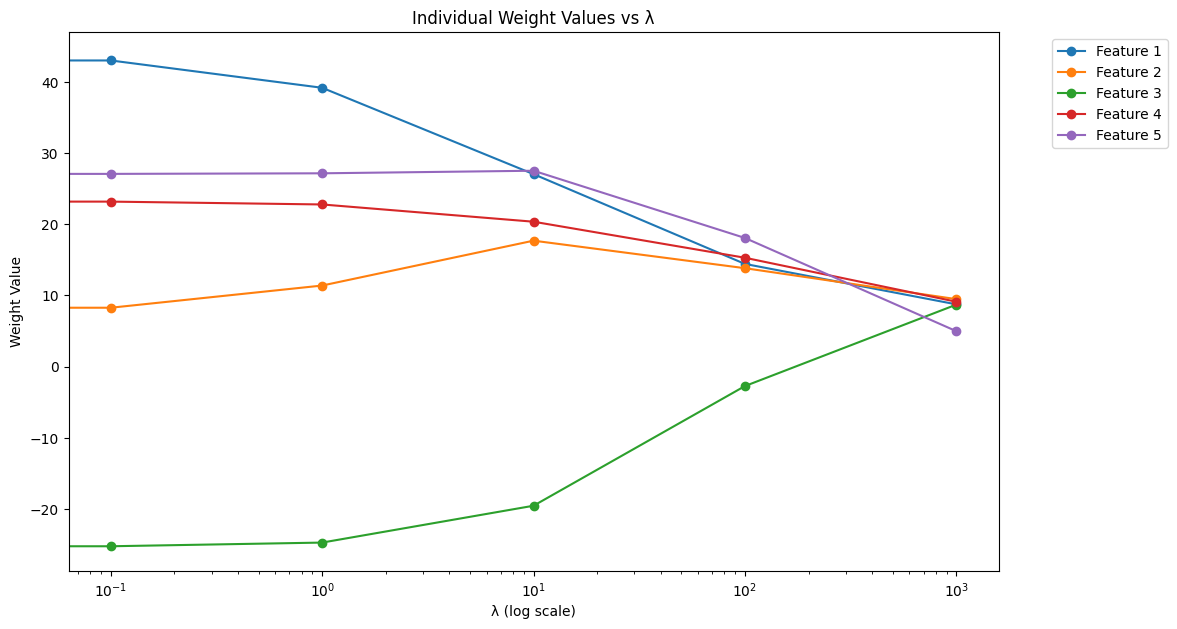

In [ ]:
# Convert to NumPy array if not already
weight_values = np.array(weight_values)  # shape: (len(lambdas), num_features)

plt.figure(figsize=(12,7))
for i in range(weight_values.shape[1]):
    plt.plot(lambdas, weight_values[:, i], marker='o', label=f"Feature {i+1}")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Weight Value")
plt.title("Individual Weight Values vs λ")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()


In [ ]:
# Assuming X_train, X_test, y_train, y_test, lambdas are already defined

train_accs = []
test_accs = []

for l in lambdas:
    C = np.inf if l == 0 else 1/l
    model = LogisticRegression(C=C, max_iter=1000, solver='lbfgs')
    model.fit(X_train, y_train)

    # Accuracy
    train_accs.append(model.score(X_train, y_train))
    test_accs.append(model.score(X_test, y_test))


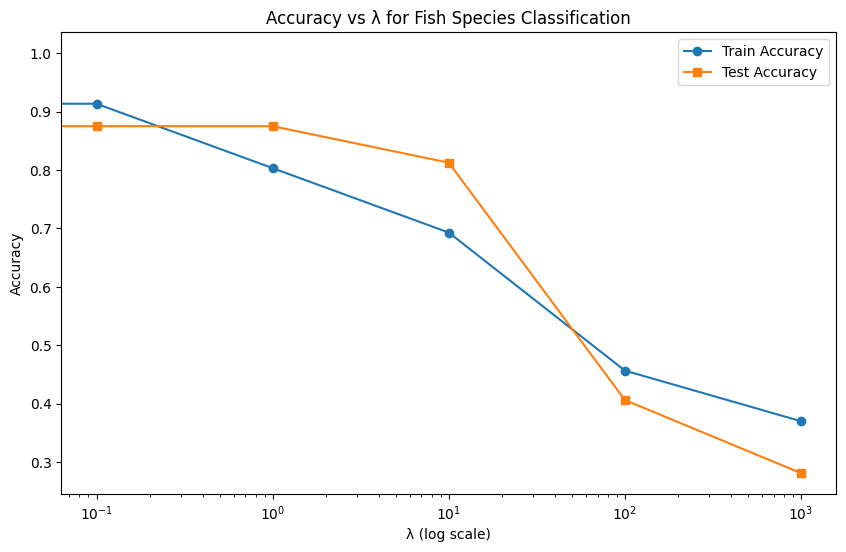

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(lambdas, train_accs, marker='o', label="Train Accuracy")
plt.plot(lambdas, test_accs, marker='s', label="Test Accuracy")
plt.xscale("log")
plt.xlabel("λ (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs λ for Fish Species Classification")
plt.legend()
plt.show()


In [ ]:
# Required imports
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

# Gaussian basis function
def gaussian_basis_transform(X, sigma=1.0, n_basis=5):
    means = np.linspace(-10, 10, n_basis)
    X_new = []
    for col in X.T:
        feats = [np.exp(-(col - m)**2 / (2 * sigma**2)) for m in means]
        X_new.append(np.array(feats).T)
    return np.hstack(X_new)

# Regularization and sigma
lambdas = [0.01, 0.1, 1, 10, 100]
C_values = [np.inf if l == 0 else 1/l for l in lambdas]
sigmas = [0.1, 0.5, 1, 5, 10]

# Results dictionary
results = {}

for sigma in sigmas:
    print(f"Running for σ = {sigma}")
    X_train_g = gaussian_basis_transform(X_train, sigma)
    X_test_g = gaussian_basis_transform(X_test, sigma)

    train_losses, test_losses, train_accs, test_accs = [], [], [], []

    for C, lam in zip(C_values, lambdas):
        log_reg = LogisticRegression(penalty="l2", C=C, solver="lbfgs", max_iter=1000)
        log_reg.fit(X_train_g, y_train)

        ytr_p = log_reg.predict_proba(X_train_g)
        yte_p = log_reg.predict_proba(X_test_g)

        train_losses.append(log_loss(y_train, ytr_p))
        test_losses.append(log_loss(y_test, yte_p))
        train_accs.append(accuracy_score(y_train, log_reg.predict(X_train_g)))
        test_accs.append(accuracy_score(y_test, log_reg.predict(X_test_g)))

    results[sigma] = {
        "train_losses": train_losses,
        "test_losses": test_losses,
        "train_accs": train_accs,
        "test_accs": test_accs
    }


Running for σ = 0.1
Running for σ = 0.5
Running for σ = 1
Running for σ = 5
Running for σ = 10


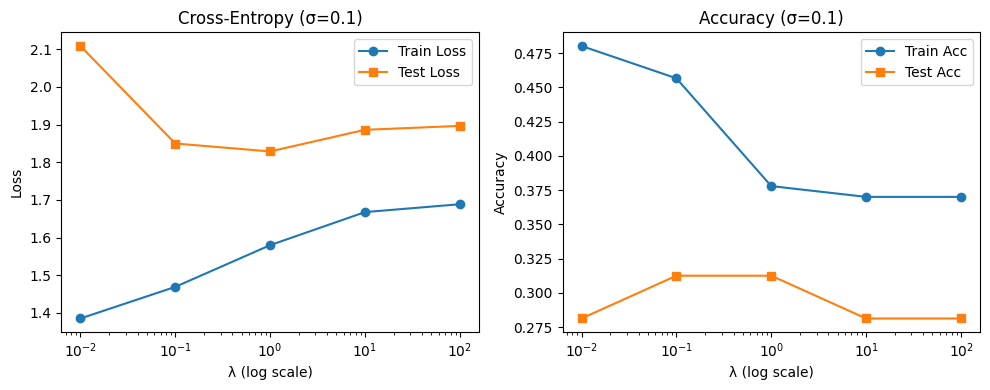

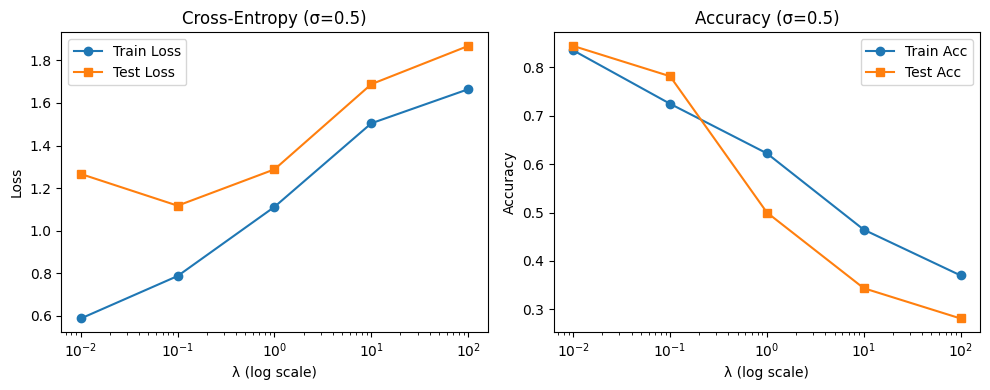

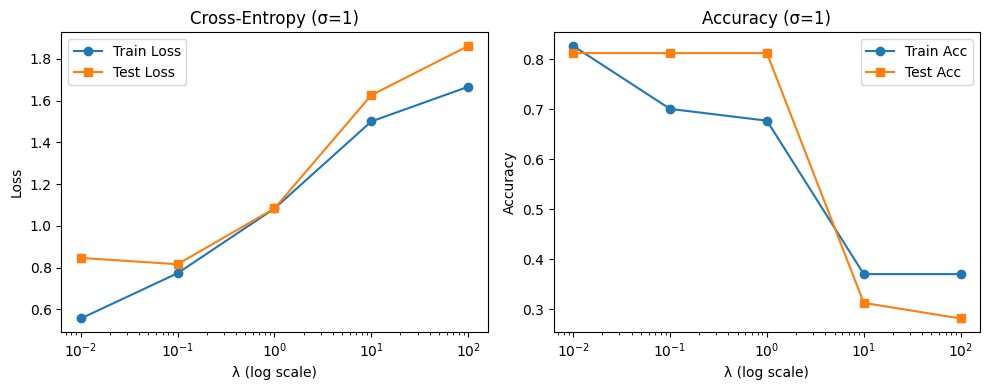

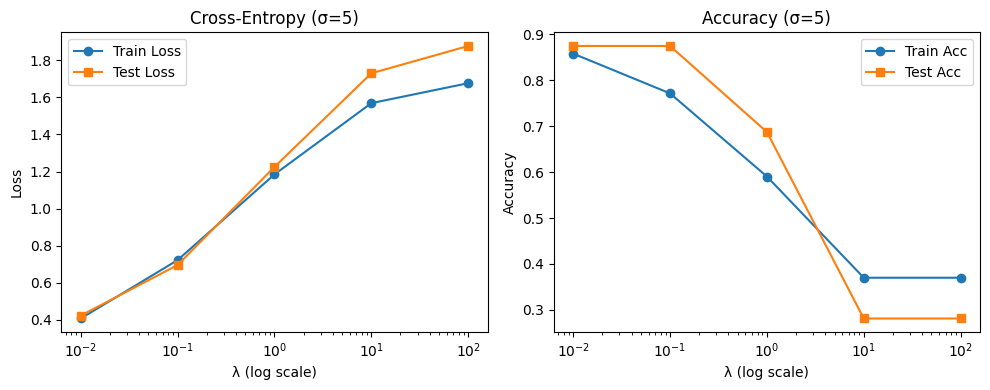

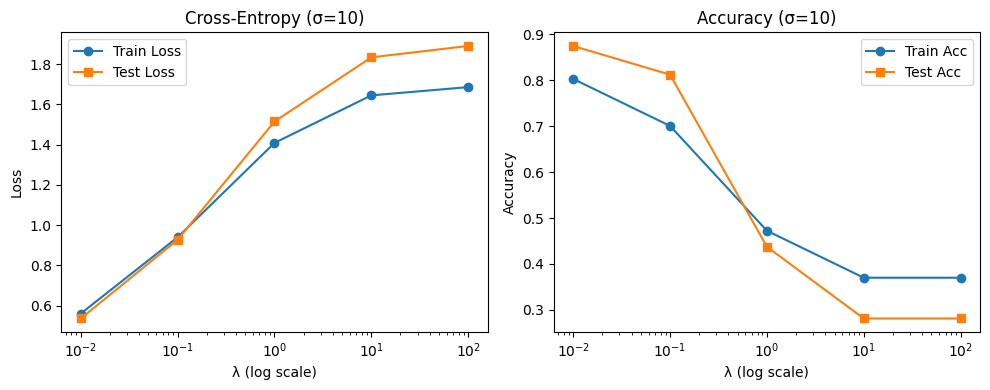

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'results', 'sigmas', and 'lambdas' are already defined from training on Fish dataset

for sigma in sigmas:
    res = results[sigma]

    plt.figure(figsize=(10,4))

    # Cross-Entropy subplot
    plt.subplot(1,2,1)
    plt.plot(lambdas, res["train_losses"], '-o', label="Train Loss")
    plt.plot(lambdas, res["test_losses"], '-s', label="Test Loss")
    plt.xscale("log")
    plt.title(f"Cross-Entropy (σ={sigma})")
    plt.xlabel("λ (log scale)")
    plt.ylabel("Loss")
    plt.legend()

    # Accuracy subplot
    plt.subplot(1,2,2)
    plt.plot(lambdas, res["train_accs"], '-o', label="Train Acc")
    plt.plot(lambdas, res["test_accs"], '-s', label="Test Acc")
    plt.xscale("log")
    plt.title(f"Accuracy (σ={sigma})")
    plt.xlabel("λ (log scale)")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
# -----------------------------
# Part F: Gaussian Basis + Logistic Regression Errors (Modified)
# -----------------------------

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Already NumPy arrays
X_train_np = X_train
X_test_np = X_test

# σ values to try
sigmas = [0.1, 0.5, 1, 5, 10]

train_errors = []
test_errors = []

# Gaussian basis function
def gaussian_basis(X, sigma, n_basis=5):
    X_new = []
    for j in range(X.shape[1]):
        means = np.linspace(-10, 10, n_basis)  # n_basis Gaussians per feature
        for m in means:
            X_new.append(np.exp(-(X[:, j] - m)**2 / (2 * sigma**2)))
    return np.array(X_new).T

# Compute errors for each σ
for sigma in sigmas:
    X_train_g = gaussian_basis(X_train_np, sigma)
    X_test_g = gaussian_basis(X_test_np, sigma)

    # Scale features
    scaler = StandardScaler()
    X_train_g = scaler.fit_transform(X_train_g)
    X_test_g = scaler.transform(X_test_g)

    # Logistic regression without regularization
    model = LogisticRegression(penalty=None, max_iter=5000, solver='lbfgs')
    model.fit(X_train_g, y_train)

    # Errors (1 - accuracy)
    train_errors.append(1 - accuracy_score(y_train, model.predict(X_train_g)))
    test_errors.append(1 - accuracy_score(y_test, model.predict(X_test_g)))

# Reference: plain logistic regression (from part c)
plain_model = LogisticRegression(penalty=None, max_iter=5000, solver='lbfgs')
plain_model.fit(X_train_np, y_train)
ref_train_error = 1 - accuracy_score(y_train, plain_model.predict(X_train_np))
ref_test_error = 1 - accuracy_score(y_test, plain_model.predict(X_test_np))

# Print results
print("Train errors with Gaussian basis:", train_errors)
print("Test errors with Gaussian basis:", test_errors)
print("Reference train error (plain logistic):", ref_train_error)
print("Reference test error (plain logistic):", ref_test_error)


Train errors with Gaussian basis: [0.4645669291338582, 0.07086614173228345, 0.0, 0.0, 0.0]
Test errors with Gaussian basis: [0.6875, 0.28125, 0.1875, 0.125, 0.09375]
Reference train error (plain logistic): 0.0
Reference test error (plain logistic): 0.09375


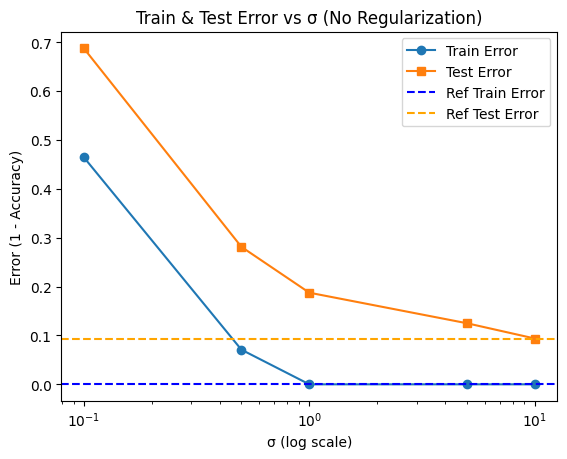

In [ ]:
import matplotlib.pyplot as plt

# Plot Train & Test Errors vs σ
plt.plot(sigmas, train_errors, '-o', label="Train Error")
plt.plot(sigmas, test_errors, '-s', label="Test Error")
plt.axhline(ref_train_error, color="blue", linestyle="--", label="Ref Train Error")
plt.axhline(ref_test_error, color="orange", linestyle="--", label="Ref Test Error")
plt.xscale("log")
plt.xlabel("σ (log scale)")
plt.ylabel("Error (1 - Accuracy)")
plt.title("Train & Test Error vs σ (No Regularization)")
plt.legend()
plt.show()


In [ ]:
# -----------------------------
# Part G: Gaussian Basis + Regularized Logistic Regression (Fish dataset)
# -----------------------------

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

# Gaussian Basis Function
def gaussian_basis(X, sigmas):
    X_new = []
    for sigma in sigmas:
        for j in range(X.shape[1]):
            for m in [-2, 0, 2]:   # only 3 centers per feature
                X_new.append(np.exp(-(X[:, j]-m)**2/(2*sigma**2)))
    return np.array(X_new).T

# σ values and λ values
sigmas = [0.1, 0.5, 1, 5, 10]
lambdas = [0, 0.1, 1, 10, 100, 1000, 10000]
C_values = [np.inf if l==0 else 1/l for l in lambdas]

# Transforming data with all σ (no .values)
X_train_all = gaussian_basis(X_train, sigmas)
X_test_all  = gaussian_basis(X_test, sigmas)

train_err, test_err, w_norm = [], [], []
w_norm_sigma = {s: [] for s in sigmas}

# Training each λ
for lam, C in zip(lambdas, C_values):
    model = LogisticRegression(penalty="l2", C=C, solver="lbfgs", max_iter=2000)
    model.fit(X_train_all, y_train)

    # Errors (log-loss)
    train_err.append(log_loss(y_train, model.predict_proba(X_train_all)))
    test_err.append(log_loss(y_test, model.predict_proba(X_test_all)))

    # Weight norms
    W = model.coef_[0]
    w_norm.append(np.linalg.norm(W))

    block_size = X_train.shape[1]*3  # 3 centers per feature
    for i, s in enumerate(sigmas):
        w_norm_sigma[s].append(np.linalg.norm(W[i*block_size:(i+1)*block_size]))


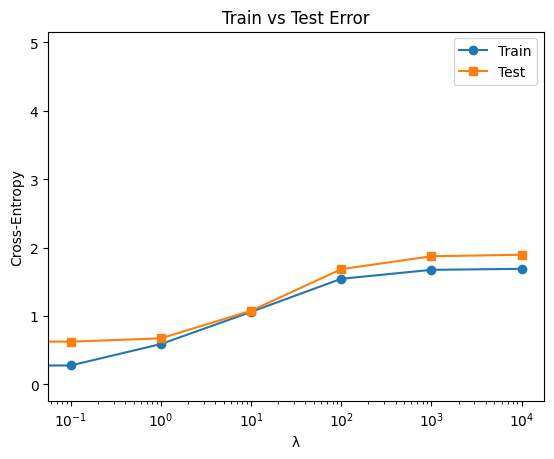

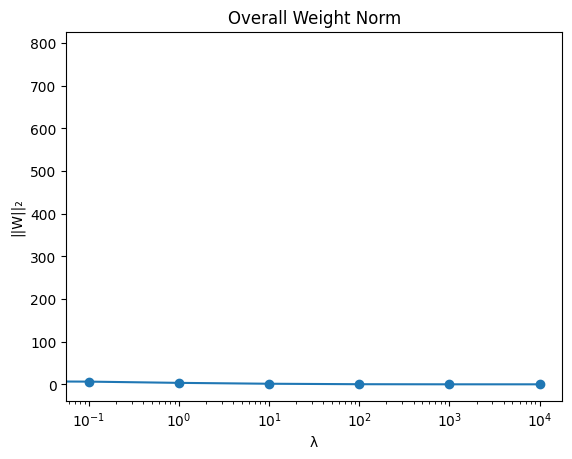

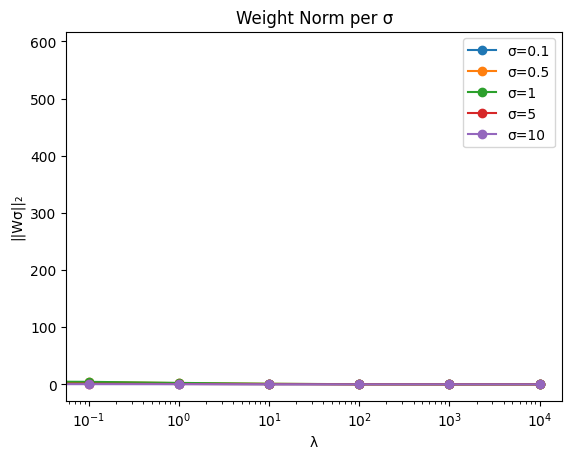

In [ ]:
# -----------------------------
# Part G Plots: Errors and Weight Norms
# -----------------------------
import matplotlib.pyplot as plt

# 1️⃣ Train vs Test Cross-Entropy
plt.plot(lambdas, train_err, '-o', label="Train")
plt.plot(lambdas, test_err, '-s', label="Test")
plt.xscale("log")
plt.xlabel("λ")
plt.ylabel("Cross-Entropy")
plt.title("Train vs Test Error")
plt.legend()
plt.show()

# 2️⃣ Overall Weight Norm
plt.plot(lambdas, w_norm, '-o')
plt.xscale("log")
plt.xlabel("λ")
plt.ylabel("||W||₂")
plt.title("Overall Weight Norm")
plt.show()

# 3️⃣ Weight Norm per σ
for s in sigmas:
    plt.plot(lambdas, w_norm_sigma[s], '-o', label=f"σ={s}")
plt.xscale("log")
plt.xlabel("λ")
plt.ylabel("||Wσ||₂")
plt.title("Weight Norm per σ")
plt.legend()
plt.show()


#Part I
**Learning Algorithm with Adaptive Gaussian Basis Functions**

So far, we fixed the placement of our Gaussian basis functions (centers μᵢ spaced evenly between –10 and 10). But this is restrictive such that the data might have patterns that do not align well with those fixed centers. A more flexible idea is to learn both the weight vector w and the basis function centers μᵢ from the data itself, while keeping the width σ fixed.

**How this works:**

**1. Model Setupt**

 i) Each input x is transformed using Gaussian basis functions:

  ϕᵢ(x) = exp(−(x − μᵢ)² / (2σ²))

 ii) Predictions are made using a linear model:

  ŷ = wᵀϕ(x)

**2. Loss Function**

 i) We use the standard error function (e.g., cross-entropy or squared error), plus an L2 penalty on the weights:

  L(w, μ) = Error(y, ŷ) + λ‖w‖²

**3. Learning Algorithm (Iterative)**

 i) Initialize μᵢ (for example, spread them evenly at the start).

 ii) Repeat until convergence:

  * Update weights w using gradient descent (similar to normal regression with regularization).

  * Update the centers μᵢ by computing the gradient of the loss with respect to each μᵢ and shifting them slightly in the direction that reduces the error.

**4. Intuition**

 i) Over time, the μᵢ values “move” to positions in the input space that better represent the data distribution.

 ii) The model adapts its basis functions instead of relying on a fixed placement.

**Impact on Bias–Variance Trade-off**

 i) Bias decreases: The model becomes more flexible and can fit the data better, since basis functions adjust to the data.

 ii) Variance increases: With more flexibility, the model risks overfitting, especially if too many basis functions are used or regularization is weak.

 iii) Regularization (λ) helps control this trade-off by limiting how large the weights w can grow.

**In simple way:** Learning μᵢ makes the model more powerful, but we need regularization to avoid overfitting.

In [ ]:
#PesudoCode

#Initialize mu_j (j=1..M) by k-means on {x_i}
#for t in 0..T-1:
    #compute Phi_ij = exp(-||x_i - mu_j||^2/(2 sigma^2))
    #fit logistic regression on Phi to get w, b (with L2 λ)
    #compute p_i = sigmoid(w^T Phi_i + b) for all i
    #for each center k:
        #grad_mu_k = (1/N) * sum_i (p_i - y_i) * w_k * Phi_ik * (x_i - mu_k) / sigma^2
        #mu_k = mu_k - eta * grad_mu_k
    #check convergence and break if small change

#Part J
**Convergence of the Algorithm**

When we allow both the weights w and the centers μᵢ of the Gaussian basis functions to be learned, the optimization problem becomes non-convex.

 i) For w (weights):

  * If μᵢ are fixed, the problem is convex.

  * Gradient descent or closed-form methods will always converge to the global optimum for w.

 ii) For μᵢ (centers):

  * Once we start updating μᵢ as well, the error surface becomes highly non-convex.

  * This means the algorithm can converge, but only to a local optimum, not necessarily the global one.

  * The final solution depends on the initialization of μᵢ and the learning rate used.

So, does it converge?

  * Yes, the algorithm does converge if the learning rate is chosen properly.

  * But it converges to a locally optimal solution, not a globally optimal one.

Why only local optimum?

Because moving μᵢ changes the feature space in a non-linear way, creating many possible “valleys” in the loss surface. Gradient descent will get stuck in one of those valleys, depending on the starting positions of μᵢ.

In simple words:

The algorithm converges, but we cannot guarantee it finds the best possible solution — only a good enough one.

Linear Regression Results (Fish dataset)
----------------------------------------
Mean Squared Error: 16763.88719314073
R² Score: 0.8821430593048696


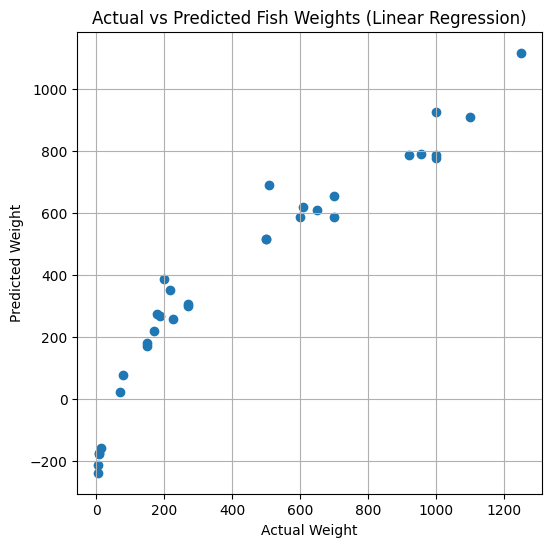

In [ ]:
# 2nd Experiment
# Linear Regression (Regression) with preprocessing steps
# Using Fish dataset

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load your Fish dataset
df = pd.read_csv('Fish.csv')

# Drop the categorical column 'Species'
df = df.drop(columns=['Species'])

# Define features and target
X = df.drop(columns=['Weight'])
y = df['Weight']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standardize (scale) the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Linear Regression ---
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = lin_reg.predict(X_test_scaled)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results (Fish dataset)")
print("----------------------------------------")
print("Mean Squared Error:", mse)
print("R² Score:", r2)

# Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Fish Weights (Linear Regression)")
plt.grid(True)
plt.show()


In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Linear Regression Results (Fish Dataset):")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))


Linear Regression Results (Fish Dataset):
MSE: 16763.88719314073
R²: 0.8821430593048696


In [ ]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)
ridge.fit(X_train_scaled, y_train)

print("\nRidge Regression Results (Fish Dataset):")
print("R² Score:", ridge.score(X_test_scaled, y_test))



Ridge Regression Results (Fish Dataset):
R² Score: 0.8770482070777225


In [ ]:
# Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
print("\nLasso Regression Results (Fish Dataset):")
print("R² Score:", lasso.score(X_test_scaled, y_test))




Lasso Regression Results (Fish Dataset):
R² Score: 0.8815104974568524


In [ ]:
# ii. Logistic Regression Experiment
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading Breast Cancer dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer(as_frame=True)
X_cancer = cancer.data
y_cancer = cancer.target

# Train-test split
from sklearn.model_selection import train_test_split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42
)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_c_scaled = scaler.fit_transform(X_train_c)
X_test_c_scaled = scaler.transform(X_test_c)

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_c_scaled, y_train_c)

# Predictions
y_pred_c = log_reg.predict(X_test_c_scaled)

# Evaluation
acc = accuracy_score(y_test_c, y_pred_c)
print("\nLogistic Regression Results (Breast Cancer Dataset):")
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))



Logistic Regression Results (Breast Cancer Dataset):
Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Confusion Matrix:
 [[41  2]
 [ 1 70]]


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and train the model
log_reg = LogisticRegression(max_iter=1000, penalty="l2", solver="lbfgs")
log_reg.fit(X_train_c_scaled, y_train_c)

# Predictions
y_pred_c = log_reg.predict(X_test_c_scaled)

# Evaluation
print("\nLogistic Regression Results (Breast Cancer Dataset):")
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))



Logistic Regression Results (Breast Cancer Dataset):
Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



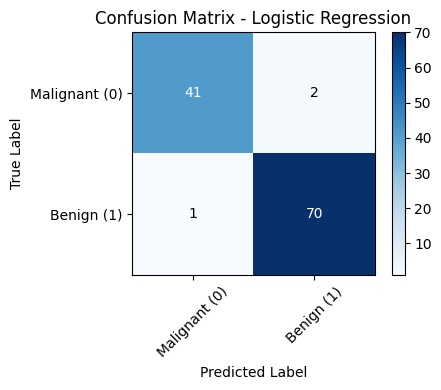

In [ ]:
# Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test_c, y_pred_c)
classes = ['Malignant (0)', 'Benign (1)']  # based on the breast cancer dataset

plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.colorbar()

# Tick marks and labels
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Annotate cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.tight_layout()
plt.show()
